# Financial Dataset Analysis
Import libraries required for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read data

In [ ]:
data=pd.read_excel(r"C:\Users\user\Desktop\powerbi\PROJECTS\Financial Data Analysis\Financial data.xlsx")
data

#Data exploration 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [5]:
data.head()

Segment  Country    Product Discount Band  Units Sold  \
0  Government   Canada  Carretera           NaN      1618.5   
1  Government  Germany  Carretera           NaN      1321.0   
2   Midmarket   France  Carretera           NaN      2178.0   
3   Midmarket  Germany  Carretera           NaN       888.0   
4   Midmarket   Mexico  Carretera           NaN      2470.0   

   Manufacturing Price  Sale Price  Gross Sales  Discounts    Sales     COGS  \
0                    3          20      32370.0        0.0  32370.0  16185.0   
1                    3          20      26420.0        0.0  26420.0  13210.0   
2                    3          15      32670.0        0.0  32670.0  21780.0   
3                    3          15      13320.0        0.0  13320.0   8880.0   
4                    3          15      37050.0        0.0  37050.0  24700.0   

    Profit       Date  Month Number Month Name  Year  
0  16185.0 2014-01-01             1    January  2014  
1  13210.0 2014-01-01             1    January  2014  
2  10890.0 2014-06-01             6       June  2014  
3   4440.0 2014-06-01             6       June  2014  
4  12350.0 2014-06-01             6       June  2014

In [6]:
data.tail()

Segment                   Country   Product Discount Band  \
695    Small Business                    France  Amarilla          High   
696    Small Business                    Mexico  Amarilla          High   
697        Government                    Mexico   Montana          High   
698        Government                    Canada     Paseo          High   
699  Channel Partners  United States of America       VTT          High   

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
695      2475.0                  260         300     742500.0  111375.00   
696       546.0                  260         300     163800.0   24570.00   
697      1368.0                    5           7       9576.0    1436.40   
698       723.0                   10           7       5061.0     759.15   
699      1806.0                  250          12      21672.0    3250.80   

         Sales      COGS    Profit       Date  Month Number Month Name  Year  
695  631125.00  618750.0  12375.00 2014-03-01             3      March  2014  
696  139230.00  136500.0   2730.00 2014-10-01            10    October  2014  
697    8139.60    6840.0   1299.60 2014-02-01             2   February  2014  
698    4301.85    3615.0    686.85 2014-04-01             4      April  2014  
699   18421.20    5418.0  13003.20 2014-05-01             5        May  2014

# Data Preprocessing

In [7]:
data.duplicated().sum()

0

In [8]:
data[["Units Sold","Manufacturing Price","Sale Price","Gross Sales","Discounts"," Sales","COGS","Profit"]].describe()

Units Sold  Manufacturing Price  Sale Price   Gross Sales  \
count   700.000000           700.000000  700.000000  7.000000e+02   
mean   1608.294286            96.477143  118.428571  1.827594e+05   
std     867.427859           108.602612  136.775515  2.542623e+05   
min     200.000000             3.000000    7.000000  1.799000e+03   
25%     905.000000             5.000000   12.000000  1.739175e+04   
50%    1542.500000            10.000000   20.000000  3.798000e+04   
75%    2229.125000           250.000000  300.000000  2.790250e+05   
max    4492.500000           260.000000  350.000000  1.207500e+06   

           Discounts         Sales           COGS         Profit  
count     700.000000  7.000000e+02     700.000000     700.000000  
mean    13150.354629  1.696091e+05  145475.211429   24133.860371  
std     22962.928775  2.367263e+05  203865.506118   42760.626563  
min         0.000000  1.655080e+03     918.000000  -40617.500000  
25%       800.320000  1.592800e+04    7490.000000    2805.960000  
50%      2585.250000  3.554020e+04   22506.250000    9242.200000  
75%     15956.343750  2.610775e+05  245607.500000   22662.000000  
max    149677.500000  1.159200e+06  950625.000000  262200.000000

In [10]:
net_profit = data['Profit'].sum()
print("Net Profit: ", net_profit)
total_sales=data[" Sales"].sum()
print("Total Sales: ",total_sales)
total_discounts=data["Discounts"].sum()
print("Total Discounts: ",total_discounts)

Net Profit:  16893702.259999998
Total Sales:  118726350.25999999
Total Discounts:  9205248.24


# Visualization
1.#Country wise analysis of number of goods sold 

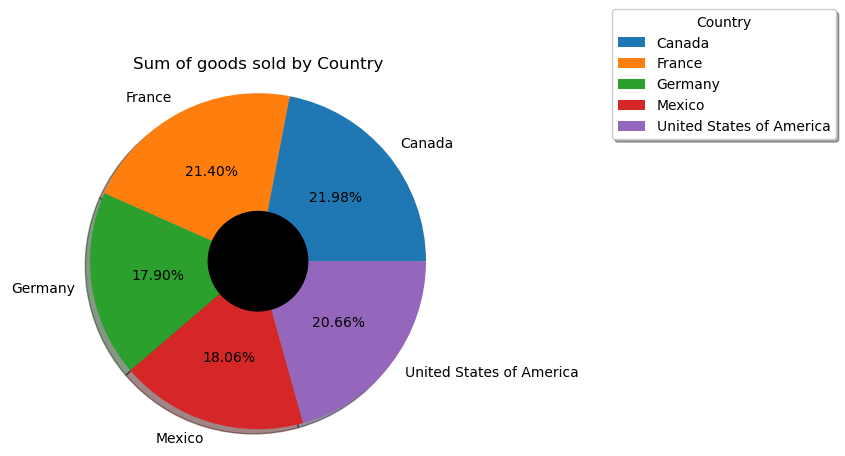

In [19]:
df=data.groupby("Country")["Units Sold"].sum()
fig, ax = plt.subplots()
ax.pie(df,labels=df.index,shadow="False",autopct='%1.2f%%')
plt.legend(title = "Country",bbox_to_anchor=(1.2, 1.2),loc='upper left',shadow="False")
center_circle = plt.Circle((0, 0), 0.30, fc='black')
fig.gca().add_artist(center_circle)
ax.axis('equal')
plt.title('Sum of goods sold by Country')
plt.show()

2.Bar chart_Discount Vs Units Sold

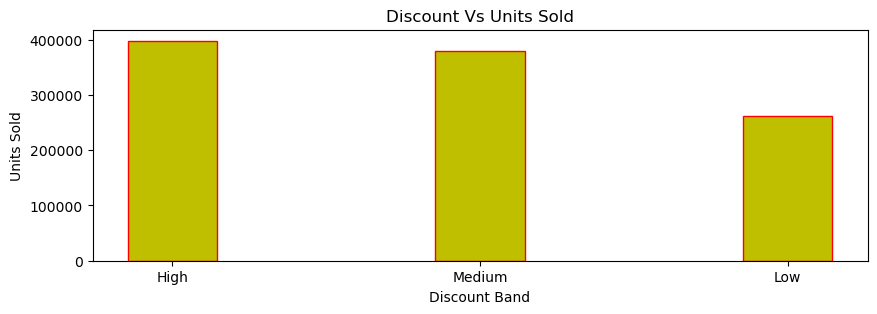

In [23]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Discount Band")["Units Sold"].sum().sort_values(ascending=False)
plt.bar(df.index,df,color="y",edgecolor="red",width=0.29)
plt.xlabel('Discount Band')
plt.ylabel('Units Sold')
plt.title("Discount Vs Units Sold")
plt.show()

Plot of  discounts against Profit

This plot helps to understand that as discount decreases, profit increases.

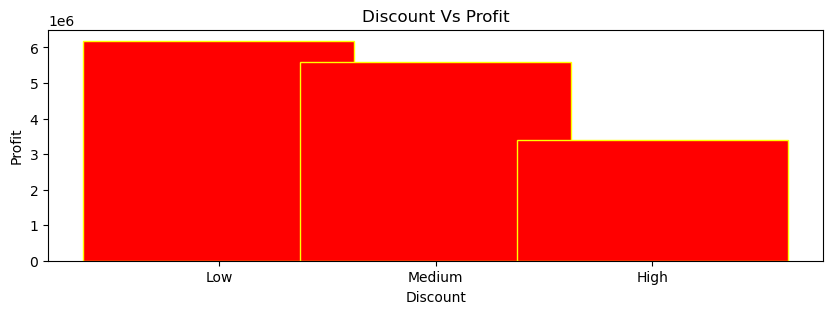

In [27]:
figure = plt.figure(figsize =(10, 3))
df=data.groupby("Discount Band")["Profit"].sum().sort_values(ascending=False)
plt.bar(df.index,df,color='r',edgecolor="yellow",width=1.25)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title("Discount Vs Profit")
plt.show()

In [36]:
total_loss = data[data['Profit'] < 0]['Profit'].sum()
print("Total Loss calculated from the entire data:", total_loss)

Total Loss calculated from the entire data: -777321.25


#Analysis of Products sold vs Profit gained


Paseo got more profit when compared to other regions.

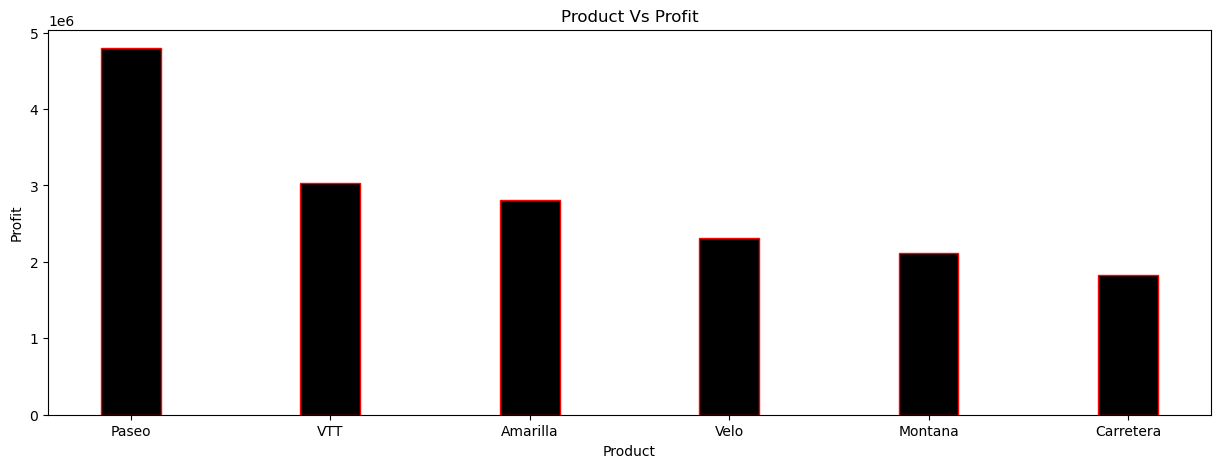

In [43]:
figure = plt.figure(figsize =(15, 5))
df=data.groupby("Product")["Profit"].sum().sort_values(ascending=False)
plt.bar(df.index,df,color="black",edgecolor="red",width=0.3)
plt.xlabel('Product')
plt.ylabel('Profit')
plt.title("Product Vs Profit")
plt.show()

Analysis of segments in which products used vs Profit gained

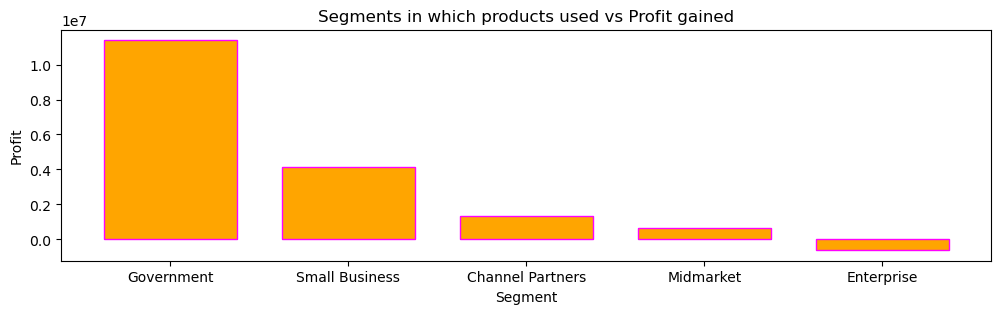

In [42]:
figure = plt.figure(figsize =(12, 3))
df=data.groupby("Segment")["Profit"].sum().sort_values(ascending=False)
plt.bar(df.index,df,color="orange",edgecolor="magenta",width=0.75)
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title("Segments in which products used vs Profit gained")
plt.show()

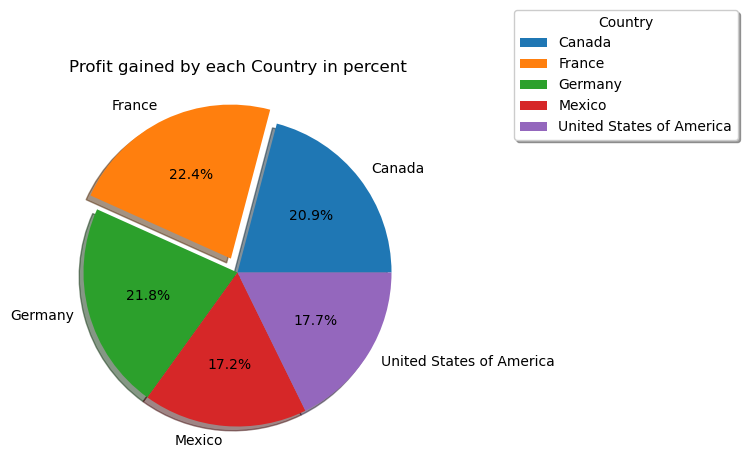

In [51]:
figure = plt.figure(figsize =(15, 5))
df=data.groupby("Country")["Profit"].sum()
plt.pie(df,labels=df.index,shadow="True",explode = [0, 0.1, 0, 0,0],autopct='%1.1f%%')
plt.legend(title = "Country",bbox_to_anchor=(1.2, 1.2),loc='upper left',shadow="True")
plt.title("Profit gained by each Country in percent")
plt.show()